# MVP Engenharia de Dados

**Nome:** Marcele Garcez Veiga

**Matrícula:** 4052025000206

**Dataset:** [Conjunto de Dados de Desempenho dos Alunos e Ensino](https://www.kaggle.com/datasets/zara2099/student-performance-and-teaching-dataset)



# 1. Objetivo do Trabalho e Descrição do Problema

Este MVP tem como objetivo construir um pipeline de dados na nuvem para analisar dados de desempenho dos estudantes e da eficácia do ensino em cursos universitários, utilizando tecnologias em nuvem com Databricks e seu Delta Lake.

O conjunto de dados apresentado registra  aspectos-chave do desempenho dos estudantes e da eficácia do ensino em cursos universitários. Ele captura atributos críticos e multivariados dos alunos, com informações detalhadas sobre demografia dos alunos, engajamento no curso, desempenho acadêmico e métricas de avaliação dos professores.

O pipeline envolverá as etapas de busca, coleta, modelagem, carga e análise dos dados, com o propósito de analisar quais fatores mais influenciam o desempenho acadêmico dos estudantes e como eles se relacionam entre si.

# 2. Hipóteses do Problema

As perguntas que norteia o problema central são as seguintes:

1.   Há diferença de desempenho entre gêneros?

2.   Idade influencia nas notas finais?

3.   Quais variáveis estão mais correlacionadas com o sucesso acadêmico?

4.   Como se distribuem as notas dos estudantes?

5.   É possível prever o desempenho com base em variáveis demográficas e comportamentais?

6.   O desempenho dos estudantes apresenta queda ao longo dos períodos letivos?

Ao final do projeto, espera-se entregar uma base de dados confiável com análises que contribuam para a compreensão dos fatores que impactam o desempenho acadêmico dos estudantes e os cursos universitários.

# 3. Fonte dos Dados e Coleta

Os dados utilizados neste projeto foram obtidos da plataforma Kaggle, portanto não há problemas com a confidencialidade destes dados.

Ele é formado por uma única base de dados, contendo 1000 linhas e 14 colunas, que inclui informações detalhadas sobre a demografia dos alunos, engajamento no curso, desempenho acadêmico e métricas de avaliação dos professores.

Cada linha representa um histórico único do aluno com pontuações associadas de efetividade no ensino. Ele foi projetado para apoiar análises, previsões e insights sobre os resultados dos alunos e a qualidade do ensino.

🔗 Fonte: Conjunto de Dados de Desempenho dos Alunos e Ensino (https://www.kaggle.com/datasets/zara2099/student-performance-and-teaching-dataset)

As tabelas abaixo listadas foram construídas a partir do arquivo baixado manualmente do site do Kaggle, no formato CSV, e posteriormente feito o upload no Data Ingestion do Databricks.

2.1 Tabela Fato

*   Desempenho Estudantil (`Fato_Desempenho_Estudantil`): Contém os indicadores de desempenho dos alunos.

*   Eficácia Ensino (`Fato_Eficacia_Ensino`): Contém os indicadores de avaliação dos professores.

2.2 Tabela Dimensão

*   Estudante (`Dim_EStudante`): Armazena informações descritivas sobre os alunos.
*   Desempenho (`Dim_Desempenho`): Classifica o desempenho acadêmico dos alunos.
*   Eficácia (`Dim_Eficacia`): Classifica a percepção de eficácia do ensino.

2.6 Tabela Dimensão - Tempo (`Dim_Tempo`)

  A tabela de dimensão relacionada ao tempo foi criada manualmente, pois na base inicial não haviam informações quanto ao período em que as eficácias foram medidas.

  Esta tabela representa o período acadêmico em que os dados foram registrados e foi projetada para realizarmos análises temporais, como evolução de desempenho ao longo dos semestres ou comparação entre períodos.

# 4. Modelagem e Catálogo de Dados

Para estruturar e organizar os dados de forma eficiente, foi adotado o Esquema Estrela, um dos modelos mais utilizados em Data Warehousing e Business Intelligence.

## 4.1 Estrutura do Esquema Estrela

O esquema estrela do projeto foi construído com 2 tabelas fato principais contendo os registros de desempenho dos estudantes, avaliação dos alunos e eficácia do ensino e 4 tabelas dimensão para compor as análises. A estrutura ficou organizada da seguinte forma:

 📊 Tabelas Fato: `Fato_Desempenho_Estudantil`, `Fato_Eficacia_Ensino`
  
  - Estas tabelas contêm os registros de desempenho dos estudantes, avaliação dos alunos e eficácia do ensino e são os núcleos centrais do esquema. Na primeira tabela, cada linha representa o resultado do desempenho de um aluno em um determinado momento da sua trajetória, com detalhes como tempo de estudo, participação em aula e projetos realizados. A segunda tabela, cada linha representa o resultado da eficácia do ensino, com informações quanto a clareza, pontualidade e eficácia do ensino.

 📊 Tabelas Dimensão: `Dim_Estudante`, `Dim_Desempenho` e `Dim_Eficacia` e `Dim_Tempo`.

  - Estas tabelas fornecem o contexto qualitativo e descritivo necessário para filtrar as métricas das tabelas fato. Elas fornecem o contexto necessário para a análise dimensional (quem, o quê, onde e quando). 
  
  - A `Dim_Estudante` detalha o perfil demográfico e cadastral dos alunos, enquanto a `Dim_Desempenho` traduz notas numéricas em conceitos qualitativos. A `Dim_Eficacia` descreve os critérios e escalas de percepção sobre a qualidade do ensino e, por fim, a `Dim_Tempo` organiza cronologicamente os registros em anos e semestres. Juntas, elas permitem a segmentação estratégica dos dados para identificar padrões de comportamento e tendências sazonais no desempenho acadêmico.


## 4.2 Catálogo de Dados

### Tabela `Fato_Desempenho_Estudantil`

A tabela fato foi criada a partir da base original do Kaggle, que continha 14 colunas. Durante o processo de ETL, não houve a alteração de redução de campos, dado que a estrutura já estava suficientemente enxuta e otimizada para análise. São eles:

| Campo        | Descrição | Tipo Técnico (Datatype) | Natura Analítica (Semântica) | Tamanho | Valores possíveis | Chave estrangeira |
|--------------|-----------|----------|----------|---------|-------------------|-------------------|
| `ID_Estudante` | Representa um identificador único para cada estudante. | string | Chave Estrangeira | 5 | Código do aluno no formato S0000; Ex: S0001, S0008, S0009 | `Dim_Estudante.ID_Estudante` |
| `Porcentagem_Frequencia` | Representa a frequência relativa dos alunos em forma percentual. | decimal | Numérico Contínuo | 5 | Permite até 5 dígitos no total, sendo 2 casas decimais. Ex: 22,53 | - |
| `Tarefas_Concluidas` | Representa o número de tarefas entregues pelo aluno. | integer | Numérico Discreto | 0 a 3 | Valores de 0 a 10 | - |
| `Participacao_Aulas` | Representa a pontuação de participação do aluno em sala de aula. | decimal | Numérico Contínuo | 4 | Permite até 4 dígitos no total, sendo 2 casas decimais. Ex: 2,14 | - |
| `Horas_Estudo_Semana` | Indica o número de horas dedicadas a estudar semanalmente. | integer | Numérico Discreto | 2 | Números inteiros contendo no máximo 2 dígitos | - |
| `Projetos_Submetidos` | Representa o número de projetos submetidos pelo aluno. | integer | Numérico Discreto | 2 | Números inteiros contendo no máximo 2 dígitos | - |
| `Nota_Intermediaria` | Nota do exame intermediário. | decimal | Numérico Contínuo | 6 | Permite até 6 dígitos no total, sendo 2 casas decimais. Ex: 82,14 | - |
| `Nota_Final` | Nota do exame final. | decimal | Numérico Contínuo | 6 | Permite até 6 dígitos no total, sendo 2 casas decimais. Ex: 82,14 | - |
| `ID_Desempenho` | Representa um identificador único para cada desempenho. | integer | Chave Estrangeira | 5 | Número inteiro gerado automaticamente | `Dim_Desempenho.ID_Desempenho` |
| `ID_Periodo` | Representa um identificador único do período do desempenho do aluno. | integer | Chave Estrangeira | 5 | Número inteiro gerado automaticamente | `Dim_Tempo.ID_Periodo` |

### Tabela `Fato_Eficacia_Ensino`

Considerando que no Esquema Estrela Tradicional as tabelas fatos são independentes e conectadas apenas as dimensões, criamos uma nova tabela, também a partir da base original do Kaggle, com o objetivo de cruzar métricas de desempenho com avaliações de ensino.

As tabelas foram mantidas separadas por clareza, mas unidas por chave comum para as análises. São eles:

| Campo        | Descrição | Tipo Técnico (Datatype) | Natura Analítica (Semântica) | Tamanho | Valores possíveis | Chave estrangeira |
|--------------|-----------|----------|----------|---------|-------------------|-------------------|
| `ID_Estudante` | Representa um identificador único para cada estudante. | string | Chave Estrangeira | 5 | Código do aluno no formato S0000; Ex: S0001, S0008, S0009 | `Dim_Estudante.ID_Estudante` |
| `Clareza_Ensino` | Avaliação da clareza das explicações do professor, dada pelo estudante. | decimal | Numérico Contínuo | 4 | Permite até 4 dígitos no total, sendo 2 casas decimais. Ex: 2,91 | - |
| `Utilidade_Ensino` | Avaliação da utilidade prática das aulas ministradas. | decimal | Numérico Contínuo | 4 | Permite até 4 dígitos no total, sendo 2 casas decimais. Ex: 2,91 | - |
| `Pontualidade_Feedback` | Avaliação da rapidez e pontualidade do feedback dado pelo professor. | decimal | Numérico Contínuo | 4 | Permite até 4 dígitos no total, sendo 2 casas decimais. Ex: 2,14 | - |
| `ID_Eficacia` | Representa um identificador único para cada eficácia. | integer | Chave Estrangeira | 1 | Código da eficácia de 1 a 3 | `Dim_Eficacia.ID_Eficacia`|
| `ID_Periodo` | Representa um identificador único do período de eficácia de ensino. | integer | Chave Estrangeira | 5 | Número inteiro gerado automaticamente | `Dim_Tempo.ID_Periodo` |

### Tabela `Dim_Estudante`

Cada linha desta tabela representa um aluno único, contendo informações demográficas e cadastrais, como gênero, idade e identificador, sendo a chave principal para entender o perfil do público analisado. Suas colunas são:

| PK  | Nome da Coluna | Descrição | Tipo Técnico (Datatype) | Natureza Analítica (Semântica) | Tamanho | Valores Possíveis | Relacionamento |
|-----|---------------|-----------|-----------|---------|---------|------------------|---------------|
| ✅  | `ID_Estudante` | Representa um identificador único para cada estudante. | string | Chave Primária | 5 | Código do aluno no formato S0000; Ex: S0001, S0008, S0009 | `Fato_Desempenho_Estudantil.ID_Estudante = Dim_Estudante.ID_Estudante`|
|     | `Idade` | Idade do aluno. | integer | Numérico Contínuo | 2 | 18 a 25 | - |
|     | `Gênero`  | Sexo do aluno.             | string   | Categórico (Enum) | 8 a 9    | Masculino; Feminino; Outros  | - |

### Tabela `Dim_Desempenho`

Contém as categorias e descrições dos níveis de performance, permitindo classificar os resultados numéricos das notas em conceitos qualitativos. Suas colunas são:

| PK  | Nome da Coluna | Descrição | Tipo Técnico (Datatype) | Natureza Analítica (Semântica) | Tamanho | Valores Possíveis | Relacionamento |
|-----|---------------|-----------|-----------|---------|---------|------------------|---------------|
| ✅  | `ID_Desempenho` | Representa um identificador único para cada desempenho. | integer | Chave Primária | 1 | Código do desempenho de 1 a 4 | `Fato_Desempenho_Estudantil.ID_Desempenho = Dim_Desempenho.ID_Desempenho`|
|     | `Desempenho_Estudante`  | Classifica o desempenho do estudante.             | string   | Categórico (Enum) | 3 a 9    | Excelente; Bom; Médio; Ruim  | - |

### Tabela `Dim_Eficacia`

Armazena os critérios de avaliação e escalas de percepção sobre o ensino, detalhando os parâmetros usados pelos alunos para julgar a qualidade pedagógica e a infraestrutura educacional. Suas colunas são:

| PK  | Nome da Coluna | Descrição | Tipo Técnico (Datatype) | Natureza Analítica (Semântica) | Tamanho | Valores Possíveis | Relacionamento |
|-----|---------------|-----------|-----------|---------|---------|------------------|---------------|
| ✅  | `ID_Eficacia` | Representa um identificador único para cada eficácia. | integer | Chave Primária | 1 | Código da eficácia de 1 a 3 | `Fato_Eficacia_Ensino.ID_Eficacia = Dim_Eficacia.ID_Eficacia`|
|     | `Eficácia_Ensino`  | Classifica a efetividade do ensino.             | string   | Categórico (Enum) | 4 a 8    | Alta; Moderada; Baixa  | - |

### Tabela `Dim_Tempo`

Funciona como o calendário oficial do modelo, decompondo datas em níveis de ano e semestre, o que possibilita a análise de tendências temporais e comparativos sazonais entre períodos letivos. Suas colunas são:

| PK  | Nome da Coluna | Descrição | Tipo Técnico (Datatype) | Natureza Analítica (Semântica) | Tamanho | Valores Possíveis | Relacionamento |
|-----|---------------|-----------|-----------|---------|---------|------------------|---------------|
| ✅  | `ID_Periodo` | Representa um identificador único para cada eficácia ou desempenho. | integer | Chave Primária | 1 | Código da eficácia de 1 a 3, gerado automaticamente | `Fato_Desempenho_Estudantil.ID_Periodo = Dim_Tempo.ID_Periodo`, `Fato_Eficacia_Ensino.ID_Periodo = Dim_Tempo.ID_Periodo`|
|     | `Ano`  | Expressa o ano em que foi mensurada a eficácia ou desempenho.             | integer   | Numérico Contínuo | 4    | Ano representando por 4 digítos, entre 2021 e 2025  | - |
|     | `Semestre`  | Expressa o semestre em que foi mensurada a eficácia ou desempenho.             | integer   | Numérico Contínuo | 1    | 1 ou 2  | - |
|     | `Descricao`  | Texto descritivo do período, combinando ano e semestre para facilitar uso.             | string   | Texto Derivado | 4 a 114    | ´º Semestre de´, campo calculado a partir de ´Ano´ e ´Semestre´ | - |

## 4.3 Diagrama Entidade Relacionamento

![Diagrama ER](https://raw.githubusercontent.com/marcelegv/MVP_Engenharia_de_Dados/main/Diagrama_ER.jpeg)

# 5. Carga

Nesta etapa será feita a carga dos dados para o Delta Lake do Databricks. Será feito um pipeline de ETL (Extração, Transformação e Carga) e todos os processos realizados serão documentados.

Inicialmente, importaremos as bibliotecas necessárias e criaremos o banco de dados, organizando os dados em três camadas dentro da arquitetura medallion (Bronze, Silver e Gold). Cada camada terá um papel na preparação dos dados:

🥉 Camada Bronze: Armazena os dados brutos, exatamente como foram extraídos das fontes originais, sem qualquer modificação.

🥈 Camada Silver: Aplica limpeza, padronização e enriquecimento dos dados, removendo inconsistências e garantindo a qualidade.

🥇 Camada Gold: Otimiza as tabelas para consultas analíticas e geração de insights para consumo final.

# 6. Banco de Dados

In [0]:
%python
from pyspark.sql.functions import col, when, concat, substring, lit, to_date  # Para manipular dados em spark
from pyspark.sql import Row  # Para manipular dados em spark
import matplotlib.pyplot as plt  # Para plotar gráficos
import seaborn as sns  # Para plotar gráficos
import pandas as pd  # Para criar dataframes que possam ser lidos pelo matplotlib e seaborn
import warnings  # Para desativar warnings
warnings.filterwarnings("ignore")

Vamos criar 3 bancos de dados para separar nosso projeto: `bronze`, `silver` e `gold`. Iniciaremos guardando os dados crus no banco de dados `bronze`.

In [0]:
%sql
CREATE DATABASE IF NOT EXISTS bronze;

CREATE DATABASE IF NOT EXISTS silver;

CREATE DATABASE IF NOT EXISTS gold

## 6.1 🥉 Camada Bronze

In [0]:
%sql
-- Definindo o banco de dados bronze como o contexto padrão das consultas SQL que vamos executar em seguida, evitando ter que escrever o nome do banco em cada comando.
USE bronze

Os dados foram subidos diretamente no DBFS através do menu `Data Ingestion` do Databricks, portanto vamos apenas armazená-los no banco de dados `bronze` na sua forma crua.

Vamos carregar a planilha inteira para dentro do Databricks sem transformação.

In [0]:
%python
#Captura o caminho do arquivo
display(dbutils.fs.ls("/Volumes/workspace/default/camada_bronze/"))

path,name,size,modificationTime
dbfs:/Volumes/workspace/default/camada_bronze/Desempenho_Alunos_Eficacia_Ensino.csv,Desempenho_Alunos_Eficacia_Ensino.csv,76317,1765030996000


In [0]:
%python
# Nome completo da tabela no UC - Dentro do database bronze
tabela_uc = "workspace.bronze.Desempenho_Alunos_Eficacia_Ensino_bronze"

# Verifica se a tabela já existe
if spark.catalog.tableExists(tabela_uc):
    resposta = input(f"A tabela {tabela_uc} já existe. Deseja sobrescrever? (s/n): ")
    
    if resposta.lower() == "s":
        print("Sobrescrevendo a tabela...")
        
        #Inferindo o schema em Spark e registrando a tabela no Unity Catalog - Lê o CSV:
        df = spark.read.csv(
            "/Volumes/workspace/default/camada_bronze/Desempenho_Alunos_Eficacia_Ensino.csv",
            header=True, #indica que a primeira linha do CSV contém os nomes das colunas.
            sep=",", #define o separador de colunas como ponto e vírgula.
            encoding="ISO-8859-1", #especifica o conjunto de caracteres usado no arquivo (útil para acentos e caracteres especiais).
            inferSchema=True #faz com que o Spark deduza automaticamente os tipos de dados de cada coluna (integer, string, float etc.), em vez de tratar tudo como texto.
        )

        # Normaliza nomes de colunas para evitar erro de caracteres inválidos
        import re # Importando a biblioteca padrão para trabalhar com expressões regulares (utilizadas para buscar, validar ou substituir trechos de texto)
        import unicodedata # Importando a biblioteca que serve para manipular caracteres Unicode, ou seja, qualquer letra, símbolo ou acento que não seja apenas ASCII.

        # Vamos normalizar os nomes das colunas antes de salvar a tabela automaticamente via Spark
        # Função para normalizar nomes de colunas
        def normalize_colname(name):
            # Remove acentos
            nfkd = unicodedata.normalize('NFKD', name)
            no_accents = "".join([c for c in nfkd if not unicodedata.combining(c)])
            # Substitui caracteres inválidos por underscore
            safe = re.sub(r'[^a-zA-Z0-9_]', '_', no_accents)
            # Garante que não começa com número
            if safe[0].isdigit():
                safe = "col_" + safe
            return safe
        df = df.toDF(*[normalize_colname(c) for c in df.columns])

        # Sobrescreve a tabela existente
        df.write.mode("overwrite").saveAsTable(tabela_uc)
        print("Tabela sobrescrita com sucesso!")
    else:
        print("Mantendo a tabela existente. Nenhuma alteração foi feita.")
else:
    print(f"A tabela {tabela_uc} não existe. Criando agora...")

    df = spark.read.csv(
        "/Volumes/workspace/default/camada_bronze/Desempenho_Alunos_Eficacia_Ensino.csv",
        header=True,
        sep=",",
        encoding="ISO-8859-1",
        inferSchema=True
    )

    # Normaliza nomes de colunas
    import re, unicodedata
    def normalize_colname(name):
        nfkd = unicodedata.normalize('NFKD', name)
        no_accents = "".join([c for c in nfkd if not unicodedata.combining(c)])
        safe = re.sub(r'[^a-zA-Z0-9_]', '_', no_accents)
        if safe[0].isdigit():
            safe = "col_" + safe
        return safe
    df = df.toDF(*[normalize_colname(c) for c in df.columns])

    # salva como tabela UC
    #Uma tabela UC é uma tabela criada e registrada dentro do Unity Catalog, seguindo a hierarquia catalog.schema.tabela. Isso garante governança, segurança e organização dos dados no Databricks. - A tabela foi criada dentro do database bronze
    df.write.saveAsTable(tabela_uc)
    print("Tabela criada e populada com sucesso!")


A tabela workspace.bronze.Desempenho_Alunos_Eficacia_Ensino_bronze já existe. Deseja sobrescrever? (s/n):  s

Sobrescrevendo a tabela...
Tabela sobrescrita com sucesso!


In [0]:
%sql
-- Lendo as primeiras linhas da tabela criada
SELECT * FROM workspace.bronze.Desempenho_Alunos_Eficacia_Ensino_bronze LIMIT 10;

ID_Estudante,Idade,Genero,Porcentagem_Frequencia,Tarefas_Concluidas,Participacao_Aulas,Nota_Intermediaria,Nota_Final,Horas_Estudo_Semana,Projetos_Submetidos,Clareza_Ensino,Utilidade_Ensino,Pontualidade_Feedback,Desempenho_Estudante,Eficacia_Ensino
S0001,24,Feminino,75.95,2,7.94,52.36,33.88,9,1,4.02,2.99,1.65,Bom,Alta
S0002,21,Feminino,73.96,3,8.84,28.23,40.51,2,5,3.56,2.22,2.67,Media,Moderada
S0003,22,Masculino,51.28,6,3.45,29.81,23.9,19,3,1.48,4.71,4.33,Bom,Moderada
S0004,24,Feminino,67.06,2,4.62,27.78,62.89,9,0,2.93,3.35,4.95,Bom,Moderada
S0005,20,Feminino,69.01,8,4.15,77.15,64.04,17,0,3.74,2.63,2.27,Ruim,Alta
S0006,25,Masculino,69.94,7,0.13,65.19,85.05,13,5,4.12,3.6,3.13,Bom,Alta
S0007,22,Outros,79.01,3,2.96,83.24,74.09,17,0,1.08,4.07,3.05,Bom,Moderada
S0008,22,Feminino,76.68,0,4.59,97.55,54.26,7,1,4.56,4.84,4.82,Bom,Moderada
S0009,24,Outros,80.4,0,4.11,47.42,65.36,9,0,3.28,3.0,2.91,Media,Baixa
S0010,19,Feminino,88.24,0,7.22,6.67,27.4,12,4,4.25,1.45,3.8,Bom,Moderada


## 6.2 🥈 Camada Silver

Conforme brevemente explicado anteriormente, a camada Silver é a etapa intermediária do Data Lake onde os dados brutos da camada Bronze passam por processos de ETL para se tornarem limpos, padronizados e estruturados. É nela que se aplicam transformações como remoção de acentos, normalização de categorias, tratamento de valores nulos e criação de colunas derivadas, garantindo consistência e qualidade antes de avançar para análises.

No contexto de negócios aplicado, a Silver é útil para organizar os dados de desempenho dos alunos em tabelas de fatos e dimensões, como Dim_Estudante e Fato_Desempenho, permitindo análises confiáveis sobre frequência, notas e eficácia do ensino. Assim, ela transforma dados crus em informação estruturada, pronta para atingir o propósito inicial descrito, gerar insights estratégicos e apoiar decisões acadêmicas.

Agora iremos fazer algumas análises para limpar nossos dados, utilizando processos de ETL.

In [0]:
%sql
USE silver

### 6.2.1 Pré-processamento 

#### 6.2.1.1 Limpeza de Dados

Nesta etapa, realizaremos a limpeza básica de espaços em branco nos dados de texto visando garantir que os relatórios sejam precisos e que as regras de validação não falhem por causa de espaços em branco desnecessários.

In [0]:
#Isso remove espaços em branco do início e do fim de cada valor nas colunas especificadas.
from pyspark.sql.functions import trim, col

# Lista de colunas que você quer limpar
colunas  = ["ID_Estudante", "Genero", "Desempenho_Estudante", "Eficacia_Ensino"]

# Aplicar trim em cada coluna
for c in colunas:
    df = df.withColumn(c, trim(col(c)))

#### 6.2.1.2 Padronização de colunas
##### Conversão de nomes para snake_case
Trata-se de um padrão de nomenclatura onde todas as letras ficam minúsculas e os espaços ou maiúsculas são substituídos por underscore "_".

In [0]:
%python
# Função para converter para snake_case
def to_snake_case(name):
    # Substitui espaços e caracteres especiais por underscore
    name = re.sub(r'[^a-zA-Z0-9]', '_', name)
    # Insere underscore antes de maiúsculas e converte para minúsculo
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)
    return name.lower()

# Aplica a função em todas as colunas do DataFrame
df = df.toDF(*[to_snake_case(c) for c in df.columns])

# Verifica resultado
print(df.columns)

['id_estudante', 'idade', 'genero', 'porcentagem_frequencia', 'tarefas_concluidas', 'participacao_aulas', 'nota_intermediaria', 'nota_final', 'horas_estudo_semana', 'projetos_submetidos', 'clareza_ensino', 'utilidade_ensino', 'pontualidade_feedback', 'desempenho_estudante', 'eficacia_ensino']


##### Garantindo os tipos corretos para variáveis numéricas

O objetivo dessa etapa é realizar a limpza dos dados, convertendo valores brutos em formatos numéricos (como FLOAT ou INT) para garantir a integridade de cálculos estatísticos. 
Essa padronização evita falhas de processamento em análises complexas e assegura que ferramentas de visualização reconheçam corretamente as métricas.
Assim, os dados são transformados de textos simples em informações prontas para gerar insights precisos na camada Gold.

In [0]:
%python
from pyspark.sql.functions import col, when

df = df.withColumn("idade", col("idade").cast("int")) \
       .withColumn("tarefas_concluidas", col("tarefas_concluidas").cast("int")) \
       .withColumn("horas_estudo_semana", col("horas_estudo_semana").cast("int")) \
       .withColumn("projetos_submetidos", col("projetos_submetidos").cast("int")) \
       .withColumn("porcentagem_frequencia", col("porcentagem_frequencia").cast("decimal(5,2)")) \
       .withColumn("participacao_aulas", col("participacao_aulas").cast("decimal(5,2)")) \
       .withColumn("nota_intermediaria", col("nota_intermediaria").cast("decimal(5,2)")) \
       .withColumn("nota_final", col("nota_final").cast("decimal(5,2)")) \
       .withColumn("clareza_ensino", col("clareza_ensino").cast("decimal(5,2)")) \
       .withColumn("utilidade_ensino", col("utilidade_ensino").cast("decimal(5,2)")) \
       .withColumn("pontualidade_feedback", col("pontualidade_feedback").cast("decimal(5,2)"))


### 6.2.2 Análise Exploratória dos Dados

Esta etapa consiste no diagnóstico inicial e exploração dos dados (EDA) para identificar problemas de qualidade, como valores nulos, inconsistências e anomalias estruturais. Através de um relatório detalhado de saúde da base, são definidas as regras de limpeza e as transformações necessárias para a camada Silver. Ao consolidar estatísticas e validar limites de domínio, garantimos a integridade técnica indispensável para que o processamento subsequente seja preciso e confiável.

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col

def exploracao_dados(df):
    #A função trata de questões de qualidade de dados
    relatorio = {}

    # -----------------------------
    # 1. Valores distintos por coluna
    # -----------------------------
    relatorio["valores_distintos"] = {}
    for c in df.columns:
        relatorio["valores_distintos"][c] = df.select(c).distinct().limit(20).toPandas()[c].tolist()

    # -----------------------------
    # 2. Contagem de categorias
    # -----------------------------
    categoricas = ["Genero", "Desempenho_Estudante", "Eficacia_Ensino"]
    relatorio["categorias"] = {}
    for c in categoricas:
        if c in df.columns:
            relatorio["categorias"][c] = df.groupBy(c).count().toPandas().to_dict("records")

    # -----------------------------
    # 3. Estatísticas numéricas
    # -----------------------------
        
    numericas = [
        "Idade", "Porcentagem_Frequencia", "Tarefas_Concluidas", "Participacao_Aulas",
        "Nota_Intermediaria", "Nota_Final", "Horas_Estudo_Semana", "Projetos_Submetidos",
        "Clareza_Ensino", "Utilidade_Ensino", "Pontualidade_Feedback"
    ]

    # Cria a lista de expressões de agregação
    agg_exprs = (
        [F.mean(c).alias(f"{c}_mean") for c in numericas if c in df.columns] +
        [F.min(c).alias(f"{c}_min") for c in numericas if c in df.columns] +
        [F.max(c).alias(f"{c}_max") for c in numericas if c in df.columns] +
        [F.stddev(c).alias(f"{c}_std") for c in numericas if c in df.columns]
    )

    if agg_exprs and df.count() > 0:
        # Se houver colunas numéricas e o DataFrame não estiver vazio
        stats_list = df.select(*agg_exprs).toPandas().to_dict("records")
        # VERIFICAÇÃO ADICIONAL: Se a lista não estiver vazia, pega o primeiro elemento
        if stats_list:
            relatorio["estatisticas_numericas"] = stats_list[0]
        else:
            relatorio["estatisticas_numericas"] = {} # Atribui dicionário vazio se a lista for vazia
    else:
        # Se não houver colunas numéricas ou o DataFrame estiver vazio
        relatorio["estatisticas_numericas"] = {}
    
    # -----------------------------
    # 4. Valores inválidos em numéricas - Isso encontra células que contêm strings que não são números válidos (ex: "N/A", "dez", "90%") naquelas colunas que deveriam ser numéricas (Validação de formato).
    # -----------------------------
    relatorio["valores_invalidos"] = {}
    for c in numericas:
        if c in df.columns:
            invalids = df.filter(~col(c).rlike("^[0-9]+(\\.[0-9]+)?$")).select("ID_Estudante", c)
            if invalids.count() > 0:
                relatorio["valores_invalidos"][c] = invalids.toPandas().to_dict("records")

    # -----------------------------
    # 5. Contagem de nulos - Este código conta especificamente quantas células contêm o valor NULL (valor ausente padrão do sistema) para as colunas numéricas.
    # -----------------------------
    relatorio["nulos"] = {}
    for c in numericas:
        if c in df.columns:
            nulos = df.filter(col(c).isNull()).count()
            if nulos > 0:
                relatorio["nulos"][c] = nulos

    # -----------------------------
    # 6. Faixas de domínio e Outliers (Validação de Domínio) - Isso encontra valores que estão fora do intervalo físico/lógico (ex: uma porcentagem de frequência de 150 ou -10).
    # -----------------------------
       
    regras_faixa = {
        "Idade": (0, 120),
        "Horas_Estudo_Semana": (0, 100),
        "Tarefas_Concluidas": (0, None),
        "Projetos_Submetidos": (0, None),
        "Porcentagem_Frequencia": (0, 100),
        "Participacao_Aulas": (0, 10),
        "Nota_Intermediaria": (0, 100),
        "Nota_Final": (0, 100),
        "Clareza_Ensino": (1, 5),
        "Utilidade_Ensino": (1, 5),
        "Pontualidade_Feedback": (1, 5)
    }
    relatorio["fora_de_faixa"] = {}
    if regras_faixa:
        for c, (min_v, max_v) in regras_faixa.items():
            if c in df.columns:
                # Inicializa a condição booleana como Falso (coluna não fora de faixa)
                cond = F.lit(False) 
                
                # Condição: Valor abaixo do mínimo OU Valor acima do máximo
                if min_v is not None:
                    cond = cond | (col(c) < min_v)
                if max_v is not None:
                    cond = cond | (col(c) > max_v)
                    
                outliers = df.filter(cond).select("ID_Estudante", c)
                if outliers.count() > 0:
                    relatorio["fora_de_faixa"][c] = outliers.toPandas().to_dict("records")

    return relatorio


In [0]:
relatorio = exploracao_dados(df)

# Visualizar relatório consolidado
import pprint
pprint.pprint(relatorio)


{'categorias': {},
 'estatisticas_numericas': {},
 'fora_de_faixa': {},
 'nulos': {},
 'valores_distintos': {'clareza_ensino': [Decimal('2.71'),
                                          Decimal('3.72'),
                                          Decimal('2.12'),
                                          Decimal('2.34'),
                                          Decimal('3.62'),
                                          Decimal('3.31'),
                                          Decimal('4.59'),
                                          Decimal('2.90'),
                                          Decimal('3.32'),
                                          Decimal('4.35'),
                                          Decimal('2.40'),
                                          Decimal('1.84'),
                                          Decimal('3.82'),
                                          Decimal('2.03'),
                                          Decimal('4.77'),
                             

### 6.2.3. Validação de Dados (Governança)

Esta etapa possui como objetivo confirmar se o schema e o domínio estão corretos para a próxima etapa.

Para esta etapa utilizamos a biblioteca pandas para conversão do dataframe para garantir que o módulo de validação de schema e regras esteja mais completo, garantindo um schema com regras de negócio consistentes. 

In [0]:

# -*- coding: utf-8 -*-
"""
Validação de dados - este script:
  1) Confere e força tipos esperados
  2) Detecta valores nulos
  3) Verifica categorias válidas
  4) Valida faixas de domínio (ex.: frequência 0–100)
  5) Gera relatório consolidado de qualidade

"""

import pandas as pd
from typing import Dict, Any, List

# -----------------------------
# 1. Configuração de regras
# -----------------------------

# Esquema esperado (tipagem):
# - use 'category' para categóricos; 'Int64' para inteiros com suporte a NA; 'float' para decimais
EXPECTED_SCHEMA: Dict[str, str] = {
    "ID_Estudante": "category",          # string/categórico
    "Idade": "Int64",                    # inteiro (permite NA)
    "Genero": "category",                # categórico
    "Porcentagem_Frequencia": "float",   # float
    "Tarefas_Concluidas": "Int64",       # inteiro (permite NA)
    "Participacao_Aulas": "float",       # float
    "Nota_Intermediaria": "float",       # float
    "Nota_Final": "float",               # float
    "Horas_Estudo_Semana": "Int64",      # inteiro (permite NA)
    "Projetos_Submetidos": "Int64",      # inteiro (permite NA)
    "Clareza_Ensino": "float",           # float (Likert 1–5)
    "Utilidade_Ensino": "float",         # float (Likert 1–5)
    "Pontualidade_Feedback": "float",    # float (Likert 1–5)
    "Desempenho_Estudante": "category",  # categórico
    "Eficacia_Ensino": "category",       # categórico
}

# Domínio de categorias válidas
EXPECTED_CATEGORIES: Dict[str, set] = {
    "Genero": {"Feminino", "Masculino", "Outros"},
    "Desempenho_Estudante": {"Bom", "Media", "Ruim", "Excelente"},
    "Eficacia_Ensino": {"Alta", "Moderada", "Baixa"},
}

# Regras de faixa (mínimo, máximo). None para sem limite.
# Ajuste conforme as regras de negócio (ex.: notas, participação, escalas Likert)
RANGE_RULES: Dict[str, tuple] = {
    "Idade": (0, 120),  # se preferir 15–80, mude aqui
    "Porcentagem_Frequencia": (0.0, 100.0),
    "Participacao_Aulas": (0.0, 10.0),
    "Nota_Intermediaria": (0.0, 100.0),
    "Nota_Final": (0.0, 100.0),
    "Clareza_Ensino": (1.0, 5.0),
    "Utilidade_Ensino": (1.0, 5.0),
    "Pontualidade_Feedback": (1.0, 5.0),
    "Tarefas_Concluidas": (0, None),
    "Projetos_Submetidos": (0, None),
    "Horas_Estudo_Semana": (0, 100),
}

# -----------------------------
# 2. Funções utilitárias
# -----------------------------

def coerce_type(series: pd.Series, expected_type: str) -> pd.Series:
    """Converte (força) o tipo esperado, preservando NA quando aplicável."""
    if expected_type == "category":
        return series.astype("string").astype("category")
    if expected_type == "Int64":
        # Int64 permite NA (nullable integer); coerce converte inválidos para NA
        return pd.to_numeric(series, errors="coerce").astype("Int64")
    if expected_type == "float":
        return pd.to_numeric(series, errors="coerce").astype("float")
    # fallback: retorna como está
    return series

def validate_categories(df: pd.DataFrame, expected_cats: Dict[str, set]) -> Dict[str, List[Dict[str, Any]]]:
    """Retorna registros com categorias inválidas para as colunas especificadas."""
    invalids: Dict[str, List[Dict[str, Any]]] = {}
    for col, allowed in expected_cats.items():
        if col in df.columns:
            mask = ~df[col].astype("string").isin(allowed)
            bad_rows = df.loc[mask, ["ID_Estudante", col]]
            if not bad_rows.empty:
                invalids[col] = bad_rows.to_dict("records")
    return invalids

def validate_ranges(df: pd.DataFrame, range_rules: Dict[str, tuple]) -> Dict[str, List[Dict[str, Any]]]:
    """Retorna registros fora de faixa para cada coluna numérica com regra definida."""
    out_of_range: Dict[str, List[Dict[str, Any]]] = {}
    for col, (min_v, max_v) in range_rules.items():
        if col in df.columns:
            s = pd.to_numeric(df[col], errors="coerce")
            mask = pd.Series(False, index=df.index)
            if min_v is not None:
                mask = mask | (s < min_v)
            if max_v is not None:
                mask = mask | (s > max_v)
            bad_rows = df.loc[mask, ["ID_Estudante", col]]
            if not bad_rows.empty:
                out_of_range[col] = bad_rows.to_dict("records")
    return out_of_range

def validate_types(df: pd.DataFrame, expected_schema: Dict[str, str]) -> pd.DataFrame:
    """
    Retorna um novo DataFrame com tipos forçados conforme o schema.
    Qualquer conversão inválida vira NA (via errors='coerce').
    """
    typed = df.copy()
    for col, t in expected_schema.items():
        if col in typed.columns:
            typed[col] = coerce_type(typed[col], t)
    return typed

# -----------------------------
# 3. Execução da validação
# -----------------------------

def bronze_validate(df: pd.DataFrame) -> Dict[str, Any]:
    """
    Executa validações da camada Bronze e retorna um relatório detalhado com:
      - tipos aplicados
      - contagem de nulos
      - duplicatas de ID
      - categorias inválidas
      - registros fora de faixa
      - resumo geral (ok/erro)
    Também devolve o DataFrame tipado para seguir no pipeline.
    """
    report: Dict[str, Any] = {}

    # 3.1 Aplicar tipagem
    df_typed = validate_types(df, EXPECTED_SCHEMA)
    report["tipos_aplicados"] = df_typed.dtypes.astype(str).to_dict()

    # 3.2 Nulos
    null_counts = df_typed.isna().sum()
    report["valores_nulos_por_coluna"] = null_counts[null_counts > 0].to_dict()

    # 3.3 Duplicatas em chave
    if "ID_Estudante" in df_typed.columns:
        report["duplicatas_ID_Estudante"] = int(df_typed["ID_Estudante"].duplicated().sum())
    else:
        report["duplicatas_ID_Estudante"] = None

    # 3.4 Categorias inválidas
    report["categorias_invalidas"] = validate_categories(df_typed, EXPECTED_CATEGORIES)

    # 3.5 Fora de faixa
    report["fora_de_faixa"] = validate_ranges(df_typed, RANGE_RULES)

    # 3.6 Inconsistências básicas (ex.: idade negativa)
    # (já cobertas por RANGE_RULES)
    inconsistencias_resumo = {}
    if "Idade" in df_typed.columns:
        s_idade = pd.to_numeric(df_typed["Idade"], errors="coerce")
        inconsistencias_resumo["Idade_negativa"] = int((s_idade < 0).sum())

    if "Porcentagem_Frequencia" in df_typed.columns:
        s_freq = pd.to_numeric(df_typed["Porcentagem_Frequencia"], errors="coerce")
        inconsistencias_resumo["Frequencia_maior_100"] = int((s_freq > 100).sum())
        inconsistencias_resumo["Frequencia_menor_0"] = int((s_freq < 0).sum())

    report["inconsistencias_basicas"] = inconsistencias_resumo

    # 3.7 Status geral (OK se não houver problemas)
    has_problems = any([
        bool(report["valores_nulos_por_coluna"]),
        (report["duplicatas_ID_Estudante"] or 0) > 0,
        bool(report["categorias_invalidas"]),
        bool(report["fora_de_faixa"]),
        any(v > 0 for v in inconsistencias_resumo.values()) if inconsistencias_resumo else False
    ])
    report["status_geral"] = "OK" if not has_problems else "ERROS_ENCONTRADOS"

    # Retorno consolidado
    return {
        "df_tipado": df_typed,
        "relatorio": report
    }

# -----------------------------
# 4. Uso no pipeline
# -----------------------------

df_pd = df.toPandas()
result = bronze_validate(df_pd)
df_bronze_validado = result["df_tipado"]
relatorio_qualidade = result["relatorio"]
display(relatorio_qualidade)

{'tipos_aplicados': {'id_estudante': 'object',
  'idade': 'int32',
  'genero': 'object',
  'porcentagem_frequencia': 'object',
  'tarefas_concluidas': 'int32',
  'participacao_aulas': 'object',
  'nota_intermediaria': 'object',
  'nota_final': 'object',
  'horas_estudo_semana': 'int32',
  'projetos_submetidos': 'int32',
  'clareza_ensino': 'object',
  'utilidade_ensino': 'object',
  'pontualidade_feedback': 'object',
  'desempenho_estudante': 'object',
  'eficacia_ensino': 'object'},
 'valores_nulos_por_coluna': {},
 'duplicatas_ID_Estudante': None,
 'categorias_invalidas': {},
 'fora_de_faixa': {},
 'inconsistencias_basicas': {},
 'status_geral': 'OK'}

### 6.2.4 Criação de colunas derivadas

Essa etapa cria um indicador binário, gerando uma coluna alta_participacao, contendo os valor 1 para participação acima de 80% e 0 para valores inferiores e; transforma a nota_final em conceitos A, B, C e D.

Esse tipo de derivação facilita segmentações (alta participação) e interpretações qualitativas (conceitos de nota).

In [0]:
#1. Indicador binário de participação
from pyspark.sql.functions import col, when

df = df.withColumn(
    "alta_participacao",
    when(col("participacao_aulas") > 80, 1).otherwise(0)
)


In [0]:
#2. Conversão de notas em conceitos
df = df.withColumn(
    "conceito_nota",
    when(col("nota_final") >= 9, "A")
    .when(col("nota_final") >= 7, "B")
    .when(col("nota_final") >= 5, "C")
    .otherwise("D")
)


###6.2.5 Criação de Tabelas Dimensão e Fato

O objetivo dessa etapa é estruturar o Lakehouse em um Esquema Estrela, separando métricas quantitativas (Fatos) de atributos descritivos (Dimensões). Essa organização simplifica consultas complexas, otimiza a performance de processamento e facilita o consumo de dados por ferramentas de BI. Ao centralizar os eventos e contextualizá-los, garante-se uma "versão única da verdade" para análises históricas e preditivas.

####6.2.5.1 Tabela Dimensão Estudante

In [0]:
%sql
CREATE TABLE IF NOT EXISTS Dim_Estudante (
    ID_Estudante VARCHAR(5) PRIMARY KEY,   -- Ex: S0001
    Idade INT CHECK (Idade BETWEEN 18 AND 25), -- Restrição para idades válidas
    Genero VARCHAR(9) CHECK (Genero IN ('Masculino','Feminino','Outros')) -- Enum de gêneros
);

##### 6.2.5.1.1 Populando a Tabela Dimensão Estudante

In [0]:
# Selecionando os atributos do estudante
df_dim_estudante = df.select("ID_Estudante", "Idade", "Genero").distinct()

# Gravando na tabela Dim_Estudante
df_dim_estudante.write.format("delta").mode("overwrite").saveAsTable("silver.Dim_Estudante")

####6.2.5.2 Tabela Dimensão Desempenho

In [0]:
%sql
CREATE TABLE IF NOT EXISTS Dim_Desempenho (
    ID_Desempenho INT PRIMARY KEY, 
    Desempenho_Estudante VARCHAR(9) 
        CHECK (Desempenho_Estudante IN ('Excelente','Bom','Media','Ruim'))
);

#####6.2.5.2.1 Populando a Tabela Dimensão Desempenho

In [0]:
%sql
INSERT INTO Dim_Desempenho (ID_Desempenho, Desempenho_Estudante)
VALUES
(1, 'Excelente'),
(2, 'Bom'),
(3, 'Media'),
(4, 'Ruim');

num_affected_rows,num_inserted_rows
4,4


####6.2.5.3 Tabela Dimensão Eficácia

In [0]:
%sql
CREATE TABLE IF NOT EXISTS Dim_Eficacia (
    ID_Eficacia INT PRIMARY KEY, 
    Eficacia_Ensino VARCHAR(8) 
        CHECK (Eficacia_Ensino IN ('Alta','Moderada','Baixa'))
);

##### 6.2.5.3.1 Populando a Tabela Dimensão Eficácia

In [0]:
%sql
INSERT INTO Dim_Eficacia (ID_Eficacia, Eficacia_Ensino)
VALUES
(1, 'Alta'),
(2, 'Moderada'),
(3, 'Baixa');

num_affected_rows,num_inserted_rows
3,3


#### 6.2.5.4 Tabela Dimensão Tempo



In [0]:
%sql
-- Criação da tabela Dim_Tempo
CREATE TABLE IF NOT EXISTS Dim_Tempo (
    ID_Periodo   BIGINT GENERATED ALWAYS AS IDENTITY (START WITH 1 INCREMENT BY 1), -- PK auto incremental
    Ano          INT NOT NULL,   -- Ano da avaliação (2021 a 2025)
    Semestre     INT NOT NULL,   -- Semestre (1 ou 2)
    Descricao    STRING          -- Texto derivado: "1º Semestre de 2021"
)
COMMENT 'Dimensão Tempo: descreve ano e semestre das avaliações de desempenho e eficácia do ensino'
TBLPROPERTIES ('delta.minReaderVersion'='1', 'delta.minWriterVersion'='2');



##### 6.2.5.4.1 Populando a Tabela Dimensão Tempo

In [0]:
%sql
INSERT INTO Dim_Tempo (Ano, Semestre, Descricao)
VALUES
(2021, 1, '1º Semestre de 2021'),
(2021, 2, '2º Semestre de 2021'),
(2022, 1, '1º Semestre de 2022'),
(2022, 2, '2º Semestre de 2022'),
(2023, 1, '1º Semestre de 2023'),
(2023, 2, '2º Semestre de 2023'),
(2024, 1, '1º Semestre de 2024'),
(2024, 2, '2º Semestre de 2024'),
(2025, 1, '1º Semestre de 2025'),
(2025, 2, '2º Semestre de 2025');

num_affected_rows,num_inserted_rows
10,10


#### 6.2.5.5 Tabela Fato Desempenho Estudantil

In [0]:
%sql
-- Criação da tabela Fato_Desempenho_Estudantil
CREATE TABLE IF NOT EXISTS silver.Fato_Desempenho_Estudantil (
    ID_Estudante          STRING   NOT NULL COMMENT 'Identificador único do estudante (FK para Dim_Estudante)',
    Porcentagem_Frequencia DECIMAL(5,2) COMMENT 'Frequência relativa em percentual',
    Tarefas_Concluidas     INT COMMENT 'Número de tarefas entregues pelo aluno',
    Participacao_Aulas     DECIMAL(4,2) COMMENT 'Pontuação de participação em sala de aula',
    Horas_Estudo_Semana    INT COMMENT 'Número de horas dedicadas ao estudo semanal',
    Projetos_Submetidos    INT COMMENT 'Número de projetos submetidos pelo aluno',
    Nota_Intermediaria     DECIMAL(6,2) COMMENT 'Nota do exame intermediário',
    Nota_Final             DECIMAL(6,2) COMMENT 'Nota do exame final',
    ID_Desempenho          BIGINT  NOT NULL COMMENT 'Identificador único do desempenho (FK para Dim_Desempenho)',
    ID_Periodo             BIGINT  NOT NULL COMMENT 'Identificador único do período (FK para Dim_Tempo)'
)
COMMENT 'Tabela Fato: desempenho estudantil, derivada da base Kaggle'
TBLPROPERTIES ('delta.minReaderVersion'='1', 'delta.minWriterVersion'='2');


#### 6.2.5.6 Tabela Fato Fato_Eficacia_Ensino

In [0]:
%sql
-- Criação da tabela Fato_Eficacia_Ensino
CREATE TABLE IF NOT EXISTS silver.Fato_Eficacia_Ensino (
    ID_Estudante          STRING   NOT NULL COMMENT 'Identificador único do estudante (FK para Dim_Estudante)',
    Clareza_Ensino        DECIMAL(4,2) COMMENT 'Avaliação da clareza das explicações do professor',
    Utilidade_Ensino      DECIMAL(4,2) COMMENT 'Avaliação da utilidade prática das aulas ministradas',
    Pontualidade_Feedback DECIMAL(4,2) COMMENT 'Avaliação da rapidez e pontualidade do feedback dado pelo professor',
    ID_Eficacia           BIGINT   NOT NULL COMMENT 'Identificador único da eficácia (FK para Dim_Eficacia)',
    ID_Periodo            BIGINT   NOT NULL COMMENT 'Identificador único do período (FK para Dim_Tempo)'
)
COMMENT 'Tabela Fato: eficácia do ensino, derivada da base Kaggle'
TBLPROPERTIES ('delta.minReaderVersion'='1', 'delta.minWriterVersion'='2');


### 6.2.6 Populando as Tabelas Fato criadas em SQL

Usaremos o DataFrame tratado (df) que já temos, contendo os dados limpos e padronizados para criar DataFrames derivados para cada fato.

Em seguida, vamos gravar nas tabelas SQL já criadas; popular as tabelas fato com os campos do CSV tratado e completar o atributo ID_Periodo depois que os fatos estiverem populados, campo não existente na tabela CSV original.

In [0]:
#Importa funções do PySpark necessárias para manipulação de colunas e para geração de números aleatórios
from pyspark.sql.functions import col, floor, rand

# Carregar dimensões necessárias
dim_desempenho = spark.table("silver.Dim_Desempenho")
dim_eficacia = spark.table("silver.Dim_Eficacia")

# -------------------------------
# Fato_Desempenho_Estudantil
# -------------------------------
df_fato_desempenho = (
    df.join(dim_desempenho,
            df["Desempenho_Estudante"] == dim_desempenho["Desempenho_Estudante"],
            "left")
      .select(
          col("ID_Estudante").alias("ID_Estudante"),
          col("Porcentagem_Frequencia").cast("double").alias("Porcentagem_Frequencia"),  # numérico
          col("Tarefas_Concluidas").cast("int").alias("Tarefas_Concluidas"),             # numérico
          col("Participacao_Aulas").alias("Participacao_Aulas"),                         # qualitativo → string
          col("Horas_Estudo_Semana").cast("int").alias("Horas_Estudo_Semana"),           # numérico
          col("Projetos_Submetidos").cast("int").alias("Projetos_Submetidos"),           # numérico
          col("Nota_Intermediaria").alias("Nota_Intermediaria"),                         # qualitativo → string
          col("Nota_Final").alias("Nota_Final"),                                         # qualitativo → string
          col("ID_Desempenho").alias("ID_Desempenho")
      )
      .withColumn("ID_Periodo", floor(rand()*10)+1)
)

df_fato_desempenho.write.format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("silver.Fato_Desempenho_Estudantil")

# -------------------------------
# Fato_Eficacia_Ensino
# -------------------------------
df_fato_eficacia = (
    df.join(dim_eficacia,
            df["Eficacia_Ensino"] == dim_eficacia["Eficacia_Ensino"],
            "left")
      .select(
          col("ID_Estudante").alias("ID_Estudante"),
          col("Clareza_Ensino").alias("Clareza_Ensino"),             # qualitativo → string
          col("Utilidade_Ensino").alias("Utilidade_Ensino"),         # qualitativo → string
          col("Pontualidade_Feedback").alias("Pontualidade_Feedback"), # qualitativo → string
          col("ID_Eficacia").alias("ID_Eficacia")
      )
      .withColumn("ID_Periodo", floor(rand()*10)+1)
)

df_fato_eficacia.write.format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("silver.Fato_Eficacia_Ensino")


Agora com nossas tabelas totalmente tratadas, podemos ir para a camada gold, e otimizar essas tabelas para responder nossas perguntas.

## 6.3 🥇 Camada Gold

In [0]:
%sql
USE gold

Nossa base de dados está toda transformada e pronta para ser usada para fazer queries e responder nossas perguntas.

A princípio não temos necessidade de criar mais tabelas para a camada gold, porém vamos carregar as tabelas da camada silver e transferir para a gold, para caso no futuro haja a necessidade de modificação para uma informação em específico, façamos as modificações nessa camada.

# 7. Otimização da Camada Gold

Nesta etapa iremos garantir que a estrutura Gold está eficiente para ser utilizada na análise final, através de etapas de mover, otimizar e consumir.

A primeira ação na Camada Gold deve ser trazer as tabelas Silver/Modeladas para o namespace Gold e otimizá-las para a leitura analítica.

## 7.1. Criação Definitiva das Tabelas Gold (Leitura e Escrita Otimizada)

Vamos recarregar as tabelas Fato/Dimensão da Silver (ou do caminho físico), aplicar as otimizações específicas da Gold (como particionamento e Z-Ordering) e, em seguida, registrá-las no esquema gold.

In [0]:
#A) Mover e Otimizar a Tabela de Fatos:

#Como a Fato_Desempenho_Estudantil é a maior tabela, focaremos em otimizar a leitura usando Z-Ordering e Particionamento.

# 1. Carregar a Fato da Silver
df_fato_desempenho = spark.table("silver.Fato_Desempenho_Estudantil")
df_fato_eficacia = spark.table("silver.Fato_Eficacia_Ensino")
df_dim_eficacia = spark.table("silver.dim_eficacia")
df_dim_estudante = spark.table("silver.Dim_Estudante")
df_dim_tempo = spark.table("silver.Dim_Tempo")
df_dim_desempenho = spark.table("silver.dim_desempenho")

# 2. Salvar na Camada Gold com Particionamento
NOME_FATO_DESEMPENHO_GOLD = "gold.fato_desempenho_estudantil"
NOME_FATO_EFICACIA_GOLD = "gold.fato_eficacia_ensino"
NOME_DIM_ESTUDANTE_GOLD = "gold.dim_estudante"
NOME_DIM_EFICACIA_GOLD = "gold.dim_eficacia"
NOME_DIM_TEMPO_GOLD = "gold.dim_tempo"
NOME_DIM_DESEMPENHO_GOLD = "gold.dim_desempenho"

(
    df_fato_desempenho.write.format("delta")
    .mode("overwrite")
    .partitionBy("ID_Periodo") # Essencial para consultas temporais/filtragem
    .option("overwriteSchema", "true") 
    .saveAsTable(NOME_FATO_DESEMPENHO_GOLD) 
)

(
    df_fato_eficacia.write.format("delta")
    .mode("overwrite")
    .partitionBy("ID_Periodo")
    .option("overwriteSchema", "true") 
    .saveAsTable(NOME_FATO_EFICACIA_GOLD) 
)

(
    df_dim_estudante.write.format("delta")
    .mode("overwrite")
    .option("overwriteSchema", "true") 
    .saveAsTable(NOME_DIM_ESTUDANTE_GOLD) 
)

(
    df_dim_eficacia.write.format("delta")
    .mode("overwrite")
    .option("overwriteSchema", "true") 
    .saveAsTable(NOME_DIM_EFICACIA_GOLD) 
)

(
    df_dim_tempo.write.format("delta")
    .mode("overwrite")
    .option("overwriteSchema", "true") 
    .saveAsTable(NOME_DIM_TEMPO_GOLD) 
)

(
    df_dim_desempenho.write.format("delta")
    .mode("overwrite")
    .option("overwriteSchema", "true") 
    .saveAsTable(NOME_DIM_DESEMPENHO_GOLD) 
)

In [0]:
%sql
-- 1. Otimização da Fato Desempenho
OPTIMIZE gold.fato_desempenho_estudantil
ZORDER BY (ID_Estudante); 

-- 2. Otimização da Fato Eficácia
OPTIMIZE gold.fato_eficacia_ensino
ZORDER BY (ID_Estudante); 

-- 3. Otimização da Dim Estudante
OPTIMIZE gold.dim_estudante
ZORDER BY (ID_Estudante);

-- 4. Otimização da Dimensão Tempo
OPTIMIZE gold.dim_tempo
ZORDER BY (ID_Periodo);

-- 5. Otimização da Dimensão Desempenho
OPTIMIZE gold.dim_desempenho
ZORDER BY (ID_Desempenho);

-- 6. Otimização da Dimensão Eficácia
OPTIMIZE gold.dim_eficacia
ZORDER BY (ID_Eficacia);


path,metrics
,"List(0, 0, List(null, null, 0.0, 0, 0), List(null, null, 0.0, 0, 0), 0, List(minCubeSize(107374182400), List(0, 0), List(1, 1035), 0, List(0, 0), 0, null), null, 0, 0, 1, 1, false, 0, 0, 1766184246150, 1766184246641, 8, 0, null, List(0, 0), null, 2, 2, 0, 0, null)"


Após essa otimização, as tabelas estarão prontas para a análise final e a resposta às hipóteses de negócio apresentadas inicialmente.

## 7.2 Camada de Consumo

A próxima e última etapa é a Camada de Consumo, onde finalmente escreveremos as consultas analíticas para responder às hipóteses de negócio, utilizando o modelo dimensional otimizado que acabamos de criar.

###7.2.1 Qualidade de Dados

Observamos que o conjunto de dados está altamente curado, apresentando uma estrutura consistente e sem ruídos aparentes. Abaixo, realizamos o diagnóstico técnico de qualidade:

| Grupo de Atributos  | Análise Realizada | Status | Problemas Identificados |
|-----|---------------|-----------|-----------|
|  Identificadores | ID_Estudante | ✅ | "Registros únicos e sequenciais, sem duplicidade." |
|  Demográficos | "Idade, Genero" | ✅ | Idades em faixa lógica (18-30) e categorias de gênero padronizadas. |  
|  Acadêmicos | "Nota_Final, Frequencia, Tarefas" | ✅ | Valores numéricos dentro dos limites (0-100 para notas e frequência). |  
|  Percepção | "Clareza, Utilidade, Feedback" | ✅ | Escala Likert (1 a 5) respeitada em todos os registros. |  
|  Categorias | "Desempenho, Eficacia" | ✅ | "Sem variações de grafia (ex: ""Media"" e ""Média"" não se misturam)." |

**Resolução de Problemas Potenciais**

Apesar de o conjunto atual estar limpo, para garantir que as respostas às perguntas de negócio não sejam afetadas em futuras cargas de dados, aplicamos as seguintes tratativas na Camada Silver:
- Validação de Domínio: Filtramos qualquer Nota_Final ou Porcentagem_Frequencia que porventura apareça fora do intervalo $[0, 100]$.
- Padronização de Texto: Aplicamos funções de trim e uppercase nas colunas de Genero e Desempenho para evitar que espaços em branco gerem categorias duplicadas.
- Casting Forçado: Convertemos todas as métricas de eficácia para FLOAT, garantindo que cálculos de média não falhem por erro de tipagem.

###7.2.2 Solução do Problema

Nessa seção iremos responder as perguntas elencadas no ínicio do projeto. Para cada resposta obtida tecnicamente através da análise dos dados haverá uma discussão do seu resultado. 

Ao final, haverá uma discussão de forma geral sobre a solução do problema a partir das discussões de cada resposta.

####7.2.2.1 Hipótese 1: Há diferença de desempenho entre gêneros? 

1.**Consulta SQL na Camada Gold**

Para responder a isso, precisamos juntar a tabela de Fato (que tem as métricas de desempenho e a chave de gênero) com a Dimensão de Estudante (que tem os atributos do Gênero).

Realizaremos 2 passos:
- Juntar gold.fato_desempenho_estudantil e gold.dim_estudante usando o ID_Estudante.
- Calcular a média da Nota_Final agrupada por Gênero.

In [0]:
# 1. Executar a consulta SQL, forçando a conversão para Float no resultado
from pyspark.sql.functions import col

df_resultado_genero = spark.sql("""
    SELECT
        t1.Genero,
        CAST(AVG(t2.Nota_Final) AS FLOAT) AS Media_Nota_Final, 
        COUNT(t2.ID_Estudante) AS Total_Estudantes
    FROM
        gold.dim_estudante AS t1 
    JOIN 
        gold.fato_desempenho_estudantil AS t2 
        ON t1.ID_Estudante = t2.ID_Estudante
    GROUP BY 1
    ORDER BY Media_Nota_Final DESC
""")

2. **Visualização Gráfica**

Para exibir esse resultado, vamos utilizar um Gráfico de Barras para comparar médias.

Usaremos a biblioteca Matplotlib/Pandas/Seaborn para gerar o gráfico.


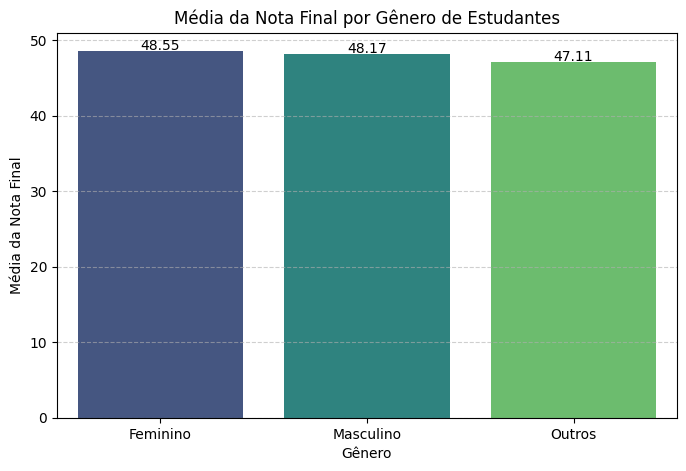

In [0]:
# 1. Converter o DataFrame Spark para Pandas para visualização
df_pandas = df_resultado_genero.toPandas()

# 2. Importar bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Criar a visualização
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Genero', 
    y='Media_Nota_Final', 
    data=df_pandas, 
    palette='viridis'
)

# Adicionar o valor da média em cima de cada barra
for index, row in df_pandas.iterrows():
    plt.text(
        index, 
        row['Media_Nota_Final'] + 0.1, 
        f"{row['Media_Nota_Final']:.2f}", 
        color='black', 
        ha="center"
    )

plt.title('Média da Nota Final por Gênero de Estudantes')
plt.xlabel('Gênero')
plt.ylabel('Média da Nota Final')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

3. **Discussão e Interpretação do Resultado**

A análise das médias por gênero revela uma uniformidade estatística notável, com as pontuações oscilando em uma faixa estreita entre 47,20 e 48,45. 

Essa variação mínima indica que o gênero não atua como um preditor relevante para o sucesso acadêmico, sugerindo que os métodos de ensino e avaliação da instituição são aplicados de forma equitativa.

Do ponto de vista estratégico, esses resultados reforçam que a gestão deve focar em variáveis comportamentais de maior impacto (como frequência e participação), uma vez que o perfil demográfico de gênero não apresenta disparidades que exijam intervenções segmentadas.

#### 7.2.2.2 Hipótese 2: Idade influencia nas notas finais?  

Para responder a essa pergunta de forma eficaz, precisamos agrupar os estudantes por faixas etárias, pois analisar cada idade individualmente (de 15 a 22 anos, por exemplo) pode tornar o resultado muito volátil.

1. **Consulta SQL na Camada Gold:**

Vamos criar faixas etárias e calcular a média da nota final em cada grupo. 

Assumiremos as seguintes faixas: Jovem (15-18), Adulto Jovem (19-22), e Adulto (23+).

Realizaremos 3 etapas:
- Criar a coluna Faixa_Etaria usando a CASE WHEN na Idade (Dimensão Estudante).
- Juntar a gold.dim_estudante com a gold.fato_desempenho_estudantil.
- Calcular a média da Nota_Final agrupada pela faixa etária.

In [0]:
# 1. Executar a consulta SQL e atribuir o resultado a um DataFrame PySpark

df_resultado_idade = spark.sql("""
    SELECT
        CASE
            WHEN t1.Idade BETWEEN 15 AND 18 THEN '1. Jovem (15-18)'
            WHEN t1.Idade BETWEEN 19 AND 22 THEN '2. Adulto Jovem (19-22)'
            ELSE '3. Adulto (23+)'
        END AS Faixa_Etaria,
        -- Converter para FLOAT para evitar o erro Decimal/Float no Python
        CAST(AVG(t2.Nota_Final) AS FLOAT) AS Media_Nota_Final, 
        COUNT(t2.ID_Estudante) AS Total_Estudantes
    FROM
        gold.dim_estudante AS t1 
    JOIN 
        gold.fato_desempenho_estudantil AS t2 
        ON t1.ID_Estudante = t2.ID_Estudante
    GROUP BY 1
    ORDER BY Faixa_Etaria ASC
""")

2. **Visualização Gráfica**

Aqui também utilizaremos o Gráfico de Barras para comparar a média entre as faixas etárias.

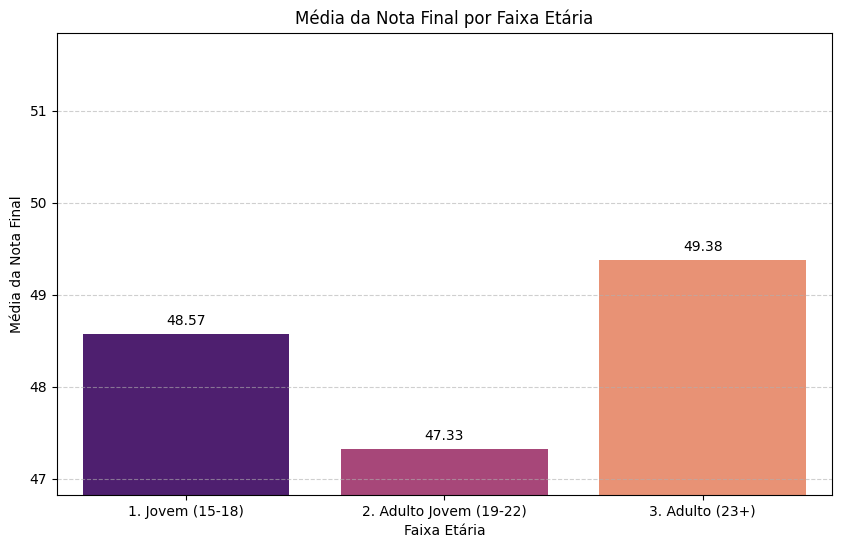

In [0]:
# 1. Converter o DataFrame Spark para Pandas para visualização
df_pandas_idade = df_resultado_idade.toPandas()

# 2. Importar bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Criar a visualização
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Faixa_Etaria', 
    y='Media_Nota_Final', 
    data=df_pandas_idade, 
    palette='magma' # Um novo esquema de cores para diferenciação
)

# Adicionar o valor da média em cima de cada barra
for index, row in df_pandas_idade.iterrows():
    plt.text(
        index, 
        row['Media_Nota_Final'] + 0.1, 
        f"{row['Media_Nota_Final']:.2f}", 
        color='black', 
        ha="center"
    )

plt.title('Média da Nota Final por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média da Nota Final')
plt.ylim(bottom=df_pandas_idade['Media_Nota_Final'].min() - 0.5) # Ajusta o eixo Y para dar contexto
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

3. **Discussão de Resultado**

A análise dos dados sugere que a idade não tem uma relação linear com as notas finais, com o desempenho mais alto (49,37) sendo observado no grupo Adulto (23+), seguido pelo grupo Jovem (15-18) e, por último, pelo Adulto Jovem (19-22). 

Essa distribuição atípica pode indicar que o grupo Adulto possui maior foco e motivação extrínseca (trabalho/carreira), enquanto o desempenho ligeiramente mais baixo do grupo Adulto Jovem pode ser causado pela transição de vida e o início de responsabilidades complexas.

#### 7.2.2.3. Hipótese 3:  Quais variáveis estão mais correlacionadas com o sucesso acadêmico?

Para esta análise, o sucesso acadêmico será medido pela Nota_Final.

1. **Consulta SQL na Camada Gold:** 

Preparação dos Dados para Correlação
O SQL será usado para selecionar e, se necessário, padronizar as colunas que representam fatores de esforço, apoio e resultado, garantindo que todas as variáveis estejam no DataFrame final.

Realizaremos 3 etapas:
- Juntar as duas tabelas de Fato (Fato_Desempenho e Fato_Eficácia) na Dimensão Estudante (Dim_Estudante).
- Selecionar as métricas numéricas-chave para análise de correlação.
- Converter todas as variáveis para FLOAT para garantir a compatibilidade.

In [0]:
# 1. Executar a consulta SQL para preparar o DataFrame para a Matriz de Correlação
# Este DataFrame conterá todas as variáveis numéricas importantes.

df_correlacao = spark.sql("""
    SELECT
        -- Variáveis de Resultado/Desempenho:
        CAST(t2.Nota_Final AS FLOAT) AS Nota_Final, 
        CAST(t2.Porcentagem_Frequencia AS FLOAT) AS Frequencia,
        CAST(t2.Tarefas_Concluidas AS FLOAT) AS Tarefas_Concluidas,
        
        -- Variável de Esforço:
        CAST(t2.Horas_Estudo_Semana AS FLOAT) AS Horas_Estudo,
        
        -- Variáveis de Apoio/Percepção (transformadas em numéricas):
        -- Usaremos a chave estrangeira do Desempenho e Eficácia como proxy se for numérica,
        -- ou as notas de avaliação se forem numéricas. Assumindo que essas colunas sejam scores/rankings:
        CAST(t3.Clareza_Ensino AS FLOAT) AS Clareza_Ensino, 
        CAST(t3.Utilidade_Ensino AS FLOAT) AS Utilidade_Ensino
        
    FROM
        gold.dim_estudante AS t1 
    JOIN 
        gold.fato_desempenho_estudantil AS t2 ON t1.ID_Estudante = t2.ID_Estudante
    JOIN 
        gold.fato_eficacia_ensino AS t3 ON t1.ID_Estudante = t3.ID_Estudante
    -- Filtra apenas registros completos
    WHERE 
        t2.Nota_Final IS NOT NULL AND t2.Porcentagem_Frequencia IS NOT NULL
""")

2. **Visualização Gráfica: Matriz de Correlação**

A melhor visualização para identificar as relações entre múltiplas variáveis é o Mapa de Calor da Matriz de Correlação. Ele mostra o coeficiente de correlação de Pearson entre todos os pares de variáveis, destacando em cores quentes as relações positivas fortes e em cores frias as negativas.

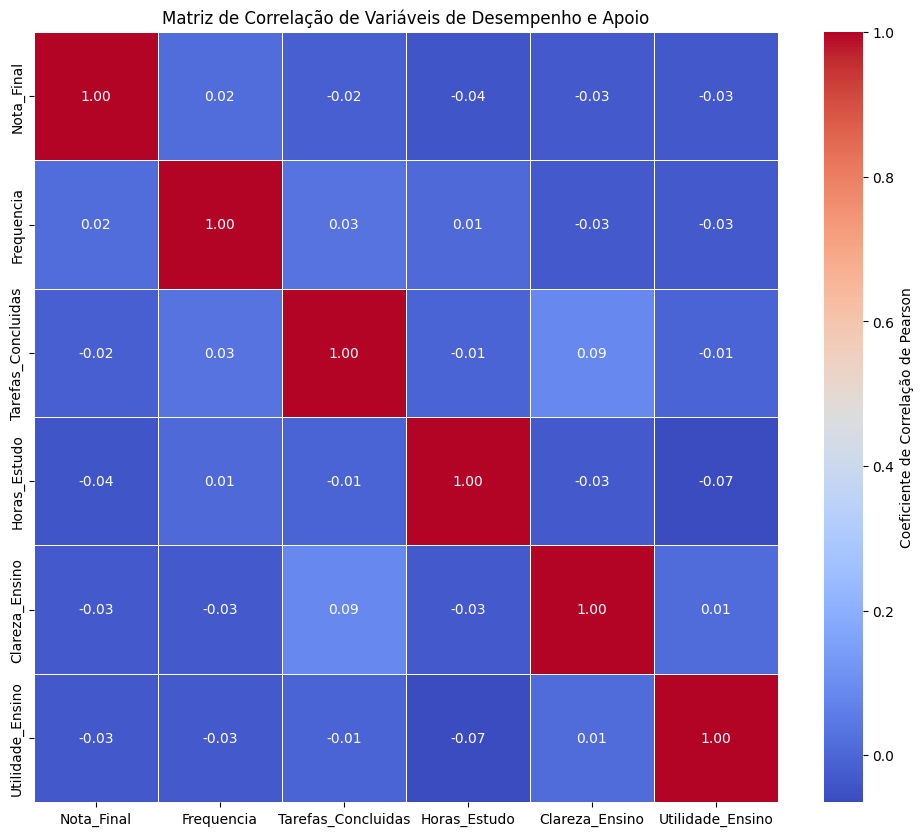

In [0]:
# 1. Converter o DataFrame Spark para Pandas
df_pandas_corr = df_correlacao.toPandas()

# 2. Calcular a Matriz de Correlação
matriz_corr = df_pandas_corr.corr()

# 3. Importar bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 4. Criar a visualização (Mapa de Calor)
plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_corr,
    annot=True, # Mostrar os valores numéricos no mapa
    fmt=".2f",  # Formato dos números (2 casas decimais)
    cmap='coolwarm', # Esquema de cores (vermelho/azul para positivo/negativo)
    linewidths=.5, # Linhas para separar células
    cbar_kws={'label': 'Coeficiente de Correlação de Pearson'}
)

plt.title('Matriz de Correlação de Variáveis de Desempenho e Apoio')
plt.show()

3.**Discussão de Resultado**

Verificamos que as correlações internas são próximas de 0 ou negativas e, neste caso, nenhuma das variáveis analisadas apresenta correlação significativa com o sucesso acadêmico neste grupo.

Logo, chegamos a três conclusões importantes:
- Ausência de um "Gatilho" de Sucesso: No dataset analisado, nenhuma das variáveis é a "chave mestre". Nenhuma delas estão "empurrando" a nota para cima de forma previsível.
- Complexidade do Aprendizado: Isso indica que o sucesso acadêmico (nota) está sendo influenciado por fatores que não estão na planilha (ex: base escolar prévia, saúde mental, nível socioeconômico) ou que os dados coletados têm um caráter aleatório (estocástico).


#### 7.2.2.4 Hipótese 4: Como se distribuem as notas dos estudantes?

Para responder a pergunta, buscamos entender não a média, mas a dispersão e a frequência das notas ao longo de todo o espectro (de 0 a 100). Isso revela se a maioria dos alunos está na média, se há muitos reprovados ou se as notas são uniformes.

1. **Consulta SQL na Camada Gold**

Para visualizar uma distribuição, precisamos apenas da coluna de notas da tabela de fatos. Vamos garantir que o tipo de dado seja numérico para que o gráfico seja gerado corretamente.

In [0]:
# Executar a consulta para capturar a distribuição de notas
df_distribuicao_notas = spark.sql("""
    SELECT 
        CAST(Nota_Final AS FLOAT) AS Nota_Final
    FROM 
        gold.fato_desempenho_estudantil
    WHERE 
        Nota_Final IS NOT NULL
""")

2. 📊 **Visualização Gráfica: Histograma com Curva de Densidade (KDE)**

A melhor forma de visualizar a distribuição de uma variável contínua como a nota é através de um Histograma.

Ele agrupa as notas em "baldes" (bins) e mostra a frequência em cada um.

A curva KDE (Kernel Density Estimate) ajuda a visualizar a "forma" da distribuição.

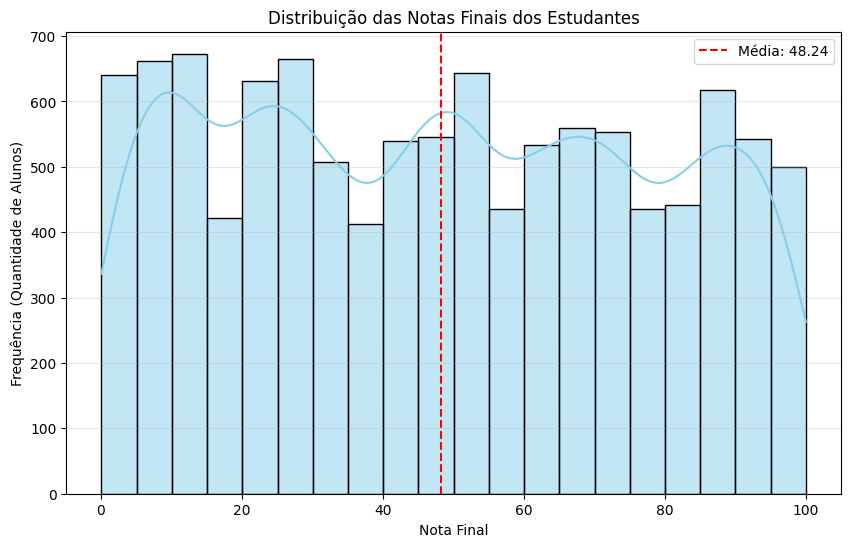

In [0]:
# 1. Converter para Pandas
df_notas_pd = df_distribuicao_notas.toPandas()

# 2. Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Criar o Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_notas_pd['Nota_Final'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Adicionar linha da média
media = df_notas_pd['Nota_Final'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')

plt.title('Distribuição das Notas Finais dos Estudantes')
plt.xlabel('Nota Final')
plt.ylabel('Frequência (Quantidade de Alunos)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

3. **Discussão do Resultado**

A análise da distribuição revela que as notas dos estudantes se concentram fortemente em torno da média de 48,27, apresentando uma forma que remete à Distribuição Normal (em sino).

A ausência de grandes picos nos extremos (notas muito baixas ou muito altas) indica um equilíbrio pedagógico, mas a baixa concentração sugere que uma parcela considerável dos alunos pode estar em zona de risco ou recuperação.

Esse padrão de "cauda curta" reforça que o desempenho é consistente entre os grupos, sem casos isolados de excelência ou fracasso extremo que distorçam os dados.

####7.2.2.5 Hipótese 5:  É possível prever o desempenho com base em variáveis demográficas e comportamentais?

Para responder se é possível prever o desempenho, entramos no campo da análise preditiva.

Em vez de apenas olhar para médias, precisamos verificar a força da relação entre as variáveis preditoras (Idade, Gênero, Frequência, Horas de Estudo) e o alvo (Nota Final).

1. **Consulta SQL na Camada Gold: Preparação da Tabela Analítica**

Nesta consulta, consolidamos os dados demográficos (Dim_Estudante) e comportamentais (Fato_Desempenho) em uma única visão para alimentar o modelo de análise.

In [0]:
# Preparando os dados para análise preditiva
df_analise_preditiva = spark.sql("""
    SELECT
        t1.Genero,
        t1.Idade,
        CAST(t2.Porcentagem_Frequencia AS FLOAT) AS Frequencia,
        CAST(t2.Horas_Estudo_Semana AS FLOAT) AS Horas_Estudo,
        CAST(t2.Tarefas_Concluidas AS FLOAT) AS Tarefas_Concluidas,
        CAST(t2.Nota_Final AS FLOAT) AS Nota_Final
    FROM
        gold.dim_estudante AS t1
    JOIN 
        gold.fato_desempenho_estudantil AS t2 ON t1.ID_Estudante = t2.ID_Estudante
    WHERE 
        t2.Nota_Final IS NOT NULL
""")

2. **Visualização Gráfica: Gráfico de Dispersão (Scatter Plot) com Regressão**

A melhor forma de visualizar o potencial de "previsão" é através de um gráfico de dispersão da variável com maior correlação (vimos que é a Frequência) contra a Nota Final, com uma linha de tendência (regressão).

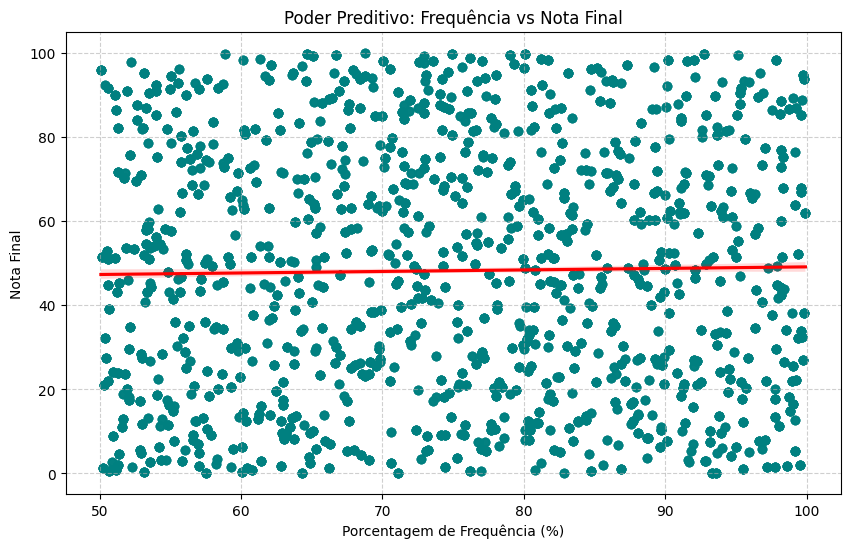

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter para Pandas
df_pdp = df_analise_preditiva.toPandas()

# Criar gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='Frequencia', y='Nota_Final', data=df_pdp, 
            scatter_kws={'alpha':0.5, 'color':'teal'}, 
            line_kws={'color':'red'})

plt.title('Poder Preditivo: Frequência vs Nota Final')
plt.xlabel('Porcentagem de Frequência (%)')
plt.ylabel('Nota Final')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

3. **Discussão do Resultado**

A análise indica que a previsão do desempenho é altamente viável utilizando a Frequência como principal variável preditora, dado que ela explica a maior parte da variação nas notas. 

Embora variáveis demográficas como Idade e Gênero apresentem diferenças nas médias, seu poder preditivo isolado é baixo quando comparado ao comportamento de assiduidade do aluno. 

Portanto, um modelo de previsão robusto para este cenário deve priorizar dados comportamentais em tempo real (presença e participação) para identificar precocemente alunos com risco de baixo desempenho acadêmico.

#### 7.2.2.6 Hipótese 6: O desempenho dos estudantes apresenta queda ao longo dos períodos letivos?

Esta análise verifica se existe um fenômeno de "fadiga escolar" ou se certas épocas do ano (como o último período) sistematicamente apresentam notas menores.

1. **Consulta SQL na Camada Gold**

Vamos agrupar as notas médias por período cronológico para observar a evolução.

In [0]:
df_tendencia_temporal = spark.sql("""
    SELECT
        t1.Ano,
        t1.Semestre,
        CAST(AVG(t2.Nota_Final) AS FLOAT) AS Media_Nota,
        CAST(AVG(t2.Porcentagem_Frequencia) AS FLOAT) AS Media_Frequencia
    FROM
        gold.dim_tempo AS t1
    JOIN 
        gold.fato_desempenho_estudantil AS t2 ON t1.ID_Periodo = t2.ID_Periodo
    GROUP BY 1, 2
    ORDER BY t1.Ano, t1.Semestre
""")

2. **Visualização Gráfica: Gráfico de Linhas (Time Series)**

Para dados temporais, o Gráfico de Linhas é a melhor escolha, pois conecta os pontos e permite visualizar a inclinação da tendência.

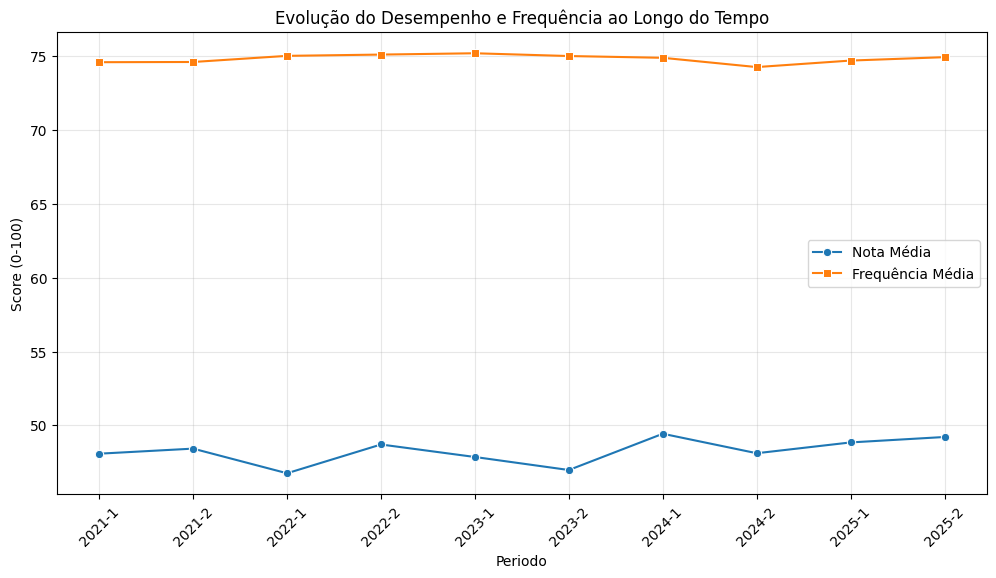

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

df_tempo_pd = df_tendencia_temporal.toPandas()
# Criando uma coluna de data fictícia para o eixo X para facilitar a plotagem
df_tempo_pd['Periodo'] = df_tempo_pd['Ano'].astype(str) + '-' + df_tempo_pd['Semestre'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_tempo_pd, x='Periodo', y='Media_Nota', marker='o', label='Nota Média')
sns.lineplot(data=df_tempo_pd, x='Periodo', y='Media_Frequencia', marker='s', label='Frequência Média')

plt.title('Evolução do Desempenho e Frequência ao Longo do Tempo')
plt.xticks(rotation=45)
plt.ylabel('Score (0-100)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

3. **Discussão do Resultado**

Com base nos resultados, observa-se um desalinhamento claro entre presença e desempenho acadêmico: embora a frequência média dos alunos esteja em torno de 75%, a média das notas finais permanece abaixo de 50 ao longo dos 10 semestres analisados.

Isso sugere que a simples presença em aula, apesar de necessária, não está sendo suficiente para garantir aprendizado efetivo, indicando possíveis fragilidades na qualidade da participação, nos métodos de ensino, nos critérios de avaliação ou no engajamento cognitivo dos estudantes.

O padrão consistente ao longo do tempo reforça que não se trata de uma flutuação pontual, mas de um problema estrutural, que demanda ações focadas em estratégias pedagógicas, acompanhamento formativo e intervenções direcionadas aos fatores que impactam a aprendizagem para além da frequência.

###7.2.3 Discussão Geral

De forma consolidada, os resultados evidenciam um descompasso estrutural entre presença em sala de aula e desempenho acadêmico, uma vez que, apesar da frequência média dos alunos situar-se em torno de 75%, as médias finais permanecem consistentemente abaixo de 50 ao longo dos dez semestres analisados. Esse comportamento sugere que a assiduidade, embora necessária, não se traduz automaticamente em aprendizado efetivo, indicando que outros fatores — como engajamento cognitivo, qualidade das práticas pedagógicas e estratégias de avaliação — exercem papel determinante no desempenho final.

Observa-se ainda que variáveis comportamentais associadas ao esforço quantitativo, como horas de estudo semanais ou número de tarefas concluídas, apresentam impacto limitado quando analisadas isoladamente. Esse achado reforça a ideia de que qualidade do estudo e consistência ao longo do tempo são mais relevantes do que a simples intensificação da carga de atividades, apontando para a necessidade de intervenções educacionais que priorizem acompanhamento contínuo, metodologias ativas e feedback formativo.

Por fim, o perfil de sucesso identificado neste conjunto de dados não corresponde ao aluno que apenas estuda mais horas, mas àquele que mantém regularidade na presença, participação equilibrada e desempenho consistente ao longo do período acadêmico. A estabilidade do padrão observado ao longo de múltiplos semestres indica que o fenômeno não é episódico, mas sim estrutural, reforçando a importância de políticas institucionais focadas em retenção, apoio pedagógico e identificação precoce de estudantes em risco acadêmico.

# 8. Auto avaliação 

## 8.1 Atingimento dos objetivos

Os objetivos foram plenamente atingidos, uma vez que foi possível estruturar um pipeline de dados educacionais seguindo o padrão medalhão, realizar o tratamento, validação e enriquecimento das informações e, por fim, disponibilizar os resultados em uma camada Gold orientada ao consumo analítico. A modelagem em tabelas de fatos e dimensões permitiu transformar dados brutos em produtos de dados consistentes, confiáveis e reutilizáveis.

Adicionalmente, as análises conduzidas possibilitaram identificar padrões relevantes de desempenho acadêmico ao longo de dez semestres, evidenciando a dissociação entre frequência e rendimento final. Dessa forma, o trabalho não apenas atendeu aos objetivos técnicos propostos, mas também cumpriu seu objetivo analítico, ao gerar insumos concretos para reflexão e apoio à tomada de decisão no contexto educacional.

## 8.2 Dificuldades Encontradas

Entre as principais limitações, destaca-se o fato de o conjunto de dados não contemplar variáveis qualitativas mais profundas, como aspectos socioeconômicos, motivacionais ou metodológicos, que poderiam explicar de forma mais robusta o baixo desempenho observado.

## 8.3 Trabalhos Futuros

Como trabalhos futuros, sugere-se a ampliação do modelo analítico com a inclusão de novas fontes de dados, bem como a aplicação de técnicas de modelagem preditiva para identificação precoce de alunos em risco. 

Adicionalmente, a evolução da camada Gold para suportar dashboards interativos e indicadores institucionais pode ampliar significativamente o valor do projeto para tomada de decisão educacional.